In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [2]:
# 目标函数
def goalFunction(x):
    goal = np.sin(2*x*np.pi)
    return goal

In [3]:
# 拟合函数
def fitFunction(p, x):
    f = np.poly1d(p)
    return f(x)

In [4]:
# 残差函数
def resFunction(p, x, y):
    res = fitFunction(p, x) - y
    return res

In [5]:
# 带正则化的残差函数
def resFunctionWithRegularization(p, x, y, regularization=0.0001):
    res = resFunction(p, x, y)
    # L2范数作为正则化项
    resR = np.append(res, np.sqrt(0.5*regularization*np.square(p)))
    return resR

In [6]:
%matplotlib inline

In [7]:
# 训练
def fit(M, flag=0):
    # M 为拟合函数最高次数
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    name = 'prediction, M=' + str(M)
    # 最小二乘法
    if flag == 0:
        p_lsq = leastsq(resFunction, p_init, args=(x, y))
    else:
        p_lsq = leastsq(resFunctionWithRegularization, p_init, args=(x, y))
        name += ' with regularization'
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    # 数据点
    plt.plot(x, y, 'ro', label='data')
    # 目标函数真实曲线
    plt.plot(x_points, goalFunction(x_points), label='Real')
    # 拟合曲线
    plt.plot(x_points, fitFunction(p_lsq[0], x_points), label=name)
    plt.legend()
    plt.show()
    return p_lsq

In [8]:
# 均匀生成十个点
x = np.linspace(0, 1, 10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [9]:
# 目标函数值
y_ = goalFunction(x)

In [10]:
# 加上正态分布噪音的 y
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [11]:
# 可视化
x_points = np.linspace(0, 1, 1000)

Fitting Parameters: [0.03725509]


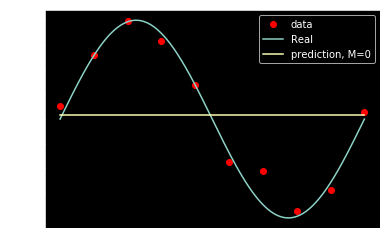

(array([0.03725509]), 1)

In [12]:
fit(M=0)

Fitting Parameters: [ 18.97056739 -28.2651224    9.2730111    0.07628314]


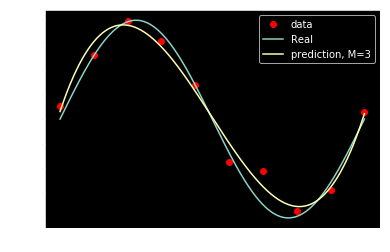

(array([ 18.97056739, -28.2651224 ,   9.2730111 ,   0.07628314]), 1)

In [13]:
fit(M=3)

Fitting Parameters: [-4.79338862e+04  2.12151800e+05 -3.93580144e+05  3.97588354e+05
 -2.37712255e+05  8.55265105e+04 -1.79213224e+04  1.95986303e+03
 -7.89784658e+01  1.33231575e-01]


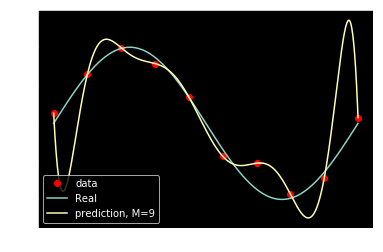

(array([-4.79338862e+04,  2.12151800e+05, -3.93580144e+05,  3.97588354e+05,
        -2.37712255e+05,  8.55265105e+04, -1.79213224e+04,  1.95986303e+03,
        -7.89784658e+01,  1.33231575e-01]), 2)

In [14]:
fit(M=9)

Fitting Parameters: [  1.34784408  -2.43045754  -2.58528835   0.83003598   5.87271973
   7.50912326  -1.21539105 -16.5405117    7.15021716   0.12958838]


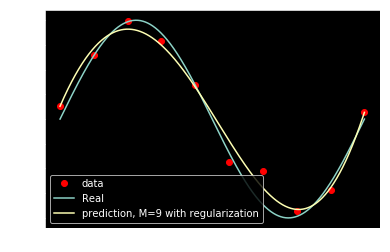

(array([  1.34784408,  -2.43045754,  -2.58528835,   0.83003598,
          5.87271973,   7.50912326,  -1.21539105, -16.5405117 ,
          7.15021716,   0.12958838]), 1)

In [15]:
# 正则化
fit(M=9, flag=1)